In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def distance(x, y): #求距离
    return abs(x-y)

def Clustering(data, k):
    #data:分数列表[[分数1， 人数1],...,[分数n， 人数n]] ， k：超参量，簇的数目
    cluster = [] #创建簇中心集合的数组
    belong = []  #记录每一个分数隶属于哪一个中心
    for _ in range(k): #按照k值在cluster中创建代表簇中心数
        cluster.append(data[random.randint(0, len(data)-1)][0])
    for _ in range(len(data)):
        belong.append(-1)  #定义初始值-1表示尚未归属
    while True:
        change = False #标志簇中心是否发生变化
        for index, d in enumerate(data):
            dis = []  #距离列表
            for c in cluster:
                dis.append( distance(d[0], c) )
            if belong[index] != dis.index(min(dis)):
                change = True
                belong[index] = dis.index(min(dis)) 
        if change == False:
            break
        for index, c in enumerate(cluster):
            sum = 0
            num = 0
            for i, b in enumerate(belong):
                if index == b:
                    sum = sum + (data[i][0] * data[i][1])
                    num = num + data[i][1]
            if num == 0:
                c = 0
            else:
                c = sum/num
                cluster[index] = c
    return cluster,belong

def criterion(data, cluster, belong):
    #data::分数列表[[分数1， 人数1],...,[分数n， 人数n]]
    #cluster:聚类中心数组，长度为k
    #belong:分数隶属中心列表
    k = len(cluster)  # 获取聚类数
    WSS = 0  # WSS:Within cluster sum of squares,表示各个点到cluster中心距离的平方和,代表误差
    for i in range(0,k):
        for index, b in enumerate(belong):
            if b == i:
                WSS += distance(cluster[i], data[index][0])
    return WSS; 

In [2]:
import os
import csv
import matplotlib.pyplot as plt
import re

a=[]
b=[]
c=[]
name='2018江苏理科.json'
pattern = re.compile('"(.*)"')
if os.path.isfile(name):
    with open(name,"r",encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            #print(line)
            c.append(line)
for i in range(len(c)):
    if i>3 and i<len(c)-4:
        st=pattern.findall(str(c[i]))
        a.append(float(st[0]))  # 分数变化
        b.append(float(c[i][0].split(':')[1]))
        
    
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


d=[]
for i in range(len(b)):
    if i==0:
        d.append(b[i])  # 每个分数的人数
    else:
        d.append(b[i]-b[i-1])

data = []
for i in range(len(d)):
    temp = [a[i],d[i]]
    data.append(temp)

最佳聚类数为: 2


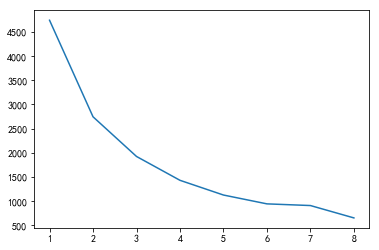

In [3]:
#获取最佳聚类数
maxk = 8
WSSarray = []  # 对聚类数为1,2,...maxk，分别存储其误差值，WSSarray的长度为maxk
for i in range(1,maxk+1):
    cluster, belong = Clustering(data, i)
    WSS = criterion(data,cluster,belong)
    WSSarray.append(WSS)
# print("不同聚类数对应的误差值所组成的数组为:",WSS)  # 输出误差数组

WSSDelta = list(np.ones(maxk))  # 获得误差数组的增量差，选择增量差最大的点对应的聚类数作为合适的聚类数
WSSDelta[0] = 0
maxDelta = -1
indexDelta = 0
for i in range(1,maxk):
    WSSDelta[i] = WSSarray[i-1] - WSSarray[i]
    if WSSDelta[i]>maxDelta:
        maxDelta = WSSDelta[i]
        indexDelta = i+1  # 最好的聚类数
# print("最大的误差差值为:",maxDelta)  # 输出最大误差
# print("误差差值对应的数组为:",SSEDelta)  # 输出误差差值
print("最佳聚类数为:",indexDelta)#输出最佳聚类数

x = list(range(1,maxk+1))
plt.plot(x, WSSarray)
plt.show()